In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from source import Vermont_Farm
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
VF = Vermont_Farm()
# df = pd.read_csv('./1850final_w_TotalOutput.csv')

# TFP as dependent variable

In [4]:
df_diversity = pd.read_csv('1850final.csv')
df_diversity = df_diversity.drop(['Name', 'town', 'unimproved', 'cash_val', 'produce_val', 'pg_num', 'year', 'rown'], axis=1)
df_diversity.head(1)

,improved,machine_val,horse,mules,milkcow,oxen,cattle,sheep,swine,livestock_val,...,hemp_waterrot,flax,flaxseed,silk,maplesugar,canesugar,molasses,beewax,manufactures_val,animals_val
0,48,100,3,0,4,0,0,0,2,450,...,0,0,0,0,0,0,0,0,0,40


In [5]:
df_diversity = df_diversity.to_numpy()
print(df_diversity.shape)
df_diversity = 1 * (df_diversity > 0)
print(df_diversity.shape)

(170, 42)
(170, 42)


In [6]:
df3 = pd.read_csv('./1850final_w_TotalOutput.csv')
div_score = np.sum(df_diversity, axis=1)
print(div_score.shape)
df3['diversity_score'] = div_score
df3.to_csv("1850diversity_score.csv")

(170,)


In [7]:
entropy_score = df3["entropy_score"].to_numpy()
df3['diversity_squared'] = np.square(div_score)
df3['e_to_diversity'] = np.exp(div_score)
df3['entropy_squared'] = np.square(entropy_score)

# generated diversity score

In [8]:
cols2 = ['improved', 'unimproved', 
       'machine_val', 'horse', 'mules']
# Fit regression model (using the natural log of one of the regressors)
# results = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data=dat).fit()
reg1 = smf.ols("TFP ~ diversity_score", data=df3).fit()
# print(reg1.summary())

In [9]:
reg2 = smf.ols("TFP ~ diversity_score + improved + unimproved", data=df3).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    TFP   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     5.133
Date:                Sat, 20 May 2023   Prob (F-statistic):            0.00202
Time:                        14:56:19   Log-Likelihood:                -1554.0
No. Observations:                 170   AIC:                             3116.
Df Residuals:                     166   BIC:                             3129.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -84.6660   1311.312     

In [10]:
reg3 = smf.ols("TFP ~ diversity_score + diversity_squared + improved + unimproved", data=df3).fit()
reg4 = smf.ols("TFP ~ entropy_score + improved + unimproved", data=df3).fit()
reg5 = smf.ols("TFP ~ entropy_score + entropy_squared + improved + unimproved", data=df3).fit()

In [11]:
reg6 = smf.ols("TFP ~ entropy_score + machine_val + cash_val", data=df3).fit()
reg7 = smf.ols("TFP ~ entropy_score + machine_val + cash_val + livestock_val + animals_val", data=df3).fit()
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:                    TFP   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     4.327
Date:                Sat, 20 May 2023   Prob (F-statistic):            0.00101
Time:                        14:56:19   Log-Likelihood:                -1551.0
No. Observations:                 170   AIC:                             3114.
Df Residuals:                     164   BIC:                             3133.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1680.2002    727.867     -2.308

In [12]:
print(df3["entropy_score"].max())
print(df3["entropy_score"].mean())
print(df3["entropy_score"].min())

1.8076306116380791
0.8893619256453733
0.1837845958028064


In [13]:
stargazer = Stargazer([reg2, reg3, reg4, reg5, reg6, reg7])

In [14]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{6}{c}{\textit{Dependent variable:}} \
\cr \cline{6-7}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) \\
\hline \\[-1.8ex]
 Intercept & -84.666$^{}$ & -4021.862$^{}$ & -1059.335$^{*}$ & -359.094$^{}$ & -2065.435$^{***}$ & -1680.200$^{**}$ \\
  & (1311.312) & (7697.173) & (597.246) & (1442.973) & (715.067) & (727.867) \\
 animals_val & & & & & & 1.810$^{}$ \\
  & & & & & & (2.162) \\
 cash_val & & & & & -0.009$^{}$ & -0.169$^{}$ \\
  & & & & & (0.143) & (0.153) \\
 diversity_score & -8.161$^{}$ & 444.648$^{}$ & & & & \\
  & (73.810) & (875.369) & & & & \\
 diversity_squared & & -12.771$^{}$ & & & & \\
  & & (24.600) & & & & \\
 entropy_score & & & 962.335$^{}$ & -700.889$^{}$ & 1944.381$^{***}$ & 1145.963$^{}$ \\
  & & & (614.844) & (3178.902) & (696.303) & (756.730) \\
 entropy_squared & & & & 914.607$^{}$ & & \\
  & & & & (1714.927) & & \\
 improved & 9.129$^{*

<AxesSubplot:xlabel='entropy_score', ylabel='TFP'>

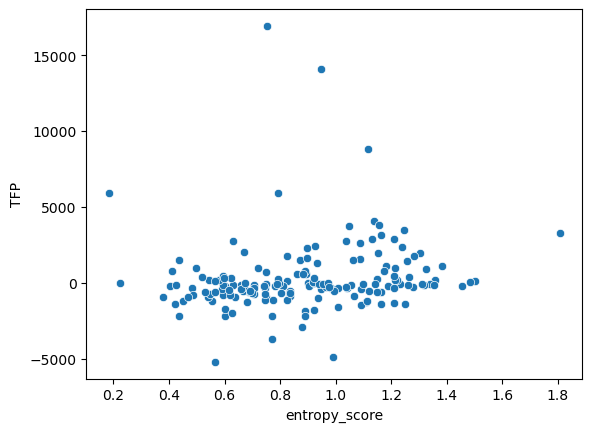

In [15]:
sns.scatterplot(data=df3, x="entropy_score", y="TFP")

<AxesSubplot:xlabel='entropy_score', ylabel='revenue_per_land'>

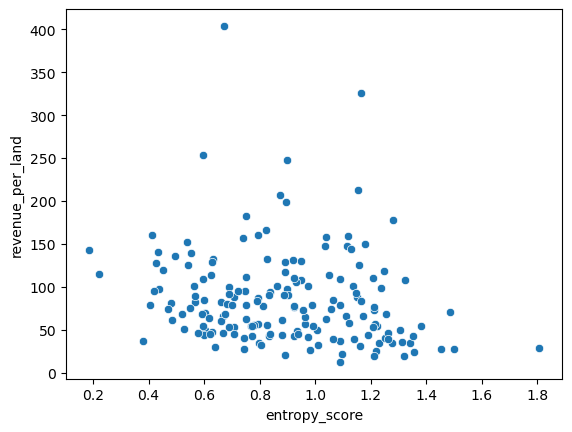

In [16]:
sns.scatterplot(data=df3, x="entropy_score", y="revenue_per_land")

<AxesSubplot:xlabel='diversity_score', ylabel='TFP'>

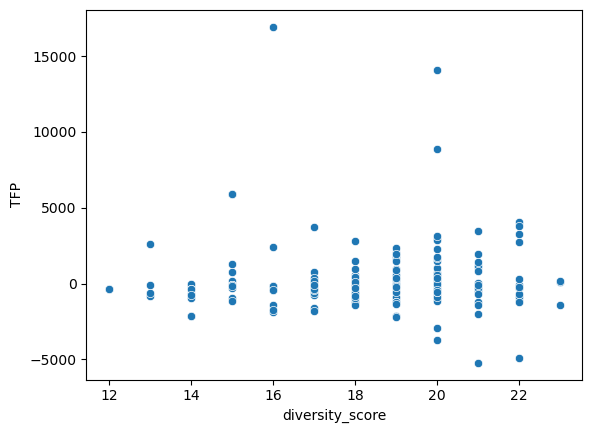

In [17]:
sns.scatterplot(data=df3, x="diversity_score", y="TFP")

<AxesSubplot:xlabel='diversity_score', ylabel='revenue_per_land'>

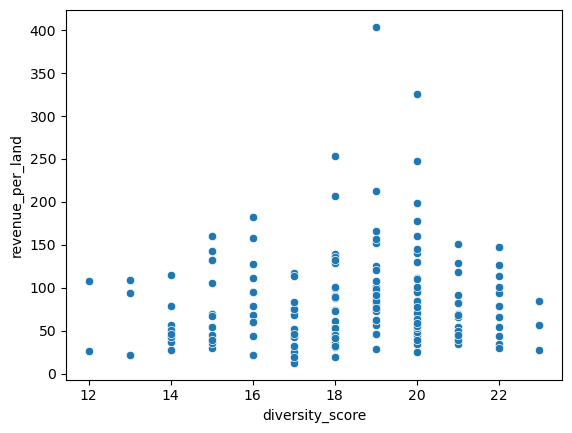

In [18]:
sns.scatterplot(data=df3, x="diversity_score", y="revenue_per_land")

# Taking logs

In [19]:
df3["log_diversity_score"] = np.log(df3['diversity_score'].to_numpy())
df3["log_entropy_score"] = np.log(df3['entropy_score'].to_numpy())
df3["log_rev_per_land"] = np.log(df3['revenue_per_land'].to_numpy())

<AxesSubplot:xlabel='log_diversity_score', ylabel='revenue_per_land'>

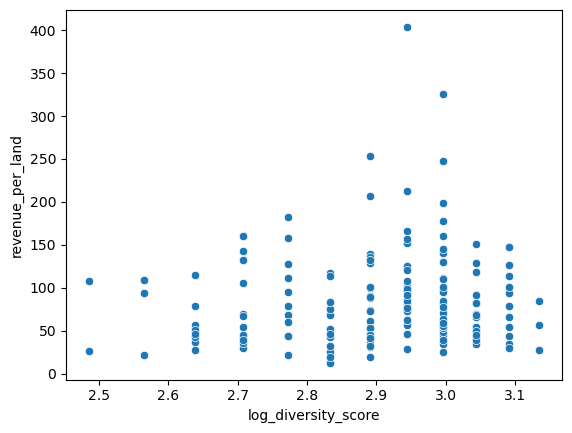

In [20]:
sns.scatterplot(data=df3, x="log_diversity_score", y="revenue_per_land")

<AxesSubplot:xlabel='log_entropy_score', ylabel='revenue_per_land'>

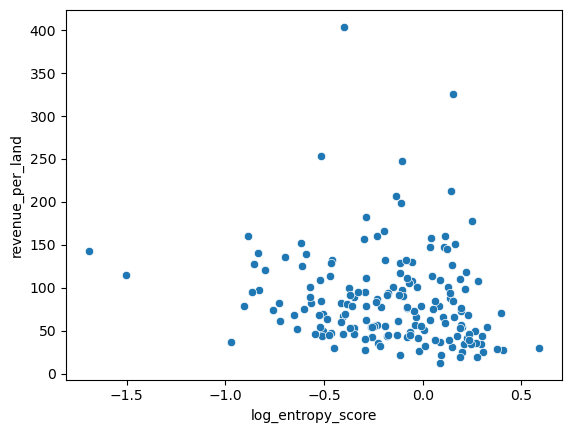

In [22]:
sns.scatterplot(data=df3, x="log_entropy_score", y="revenue_per_land")

<AxesSubplot:xlabel='entropy_score', ylabel='log_rev_per_land'>

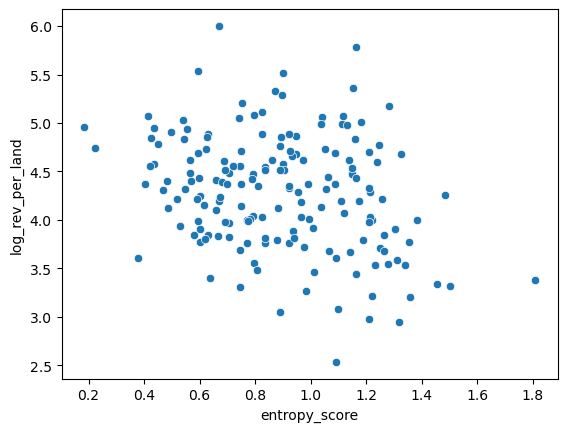

In [24]:
sns.scatterplot(data=df3, x="entropy_score", y="log_rev_per_land")